In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# Exercise 2

### 2_1 Part 1: Uniform sampling

We will compute the following 1D integral:
$$I = \int_0^1 f(x)dx = 1$$
where $$ f(x)=\frac{\pi}{2}\cos(\frac{\pi x}{2}) $$
using Uniform sampling.


100 blocks of 100 variables sampled from a uniform distribution $(0,1]$ will be used. The graph below shows the progressive average as function of the number of blocks N.

In [2]:
filepath='Ex_2_1/OUTPUT/outFile.txt'
ave=np.loadtxt(filepath, usecols = (1, ))
err=np.loadtxt(filepath, usecols = (2, ))

x=np.arange(100) +1

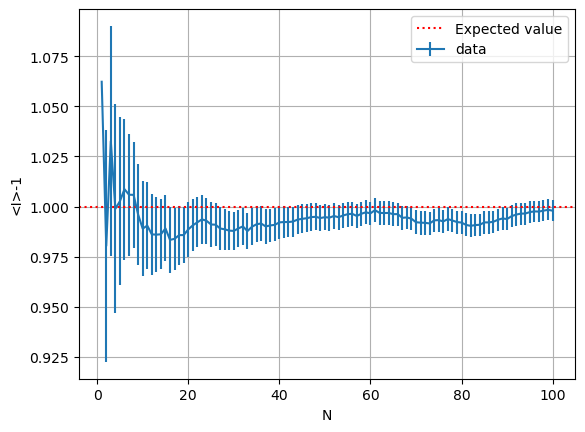

In [3]:
plt.errorbar(x, ave, yerr=err, label='data')
plt.axhline(1,color='r', linestyle="dotted", label = "Expected value")
plt.xlabel('N')
plt.ylabel('<I>-1')
plt.grid(True)
plt.legend()
plt.show()

### 2_1 Part 2: Importance sampling

We will compute the same integral using Importance Sampling.

Importance sampling consists in sampling the $x$ variables from a distribution that resembles the function to be integrated. This way, points where the function is significantly different than zero will be explored more, resulting (if the chosen distribution is "good" enough) for a reduction in the variance.

The limit to these method comes in the potential difficulty of inverse sampling from a desired distribution. In this case, a simple yet effective and invertible distribution is:
$$ p(x) = 2(1-x) $$
The inverse of the CDF of $p(x)$ can easily calculated to be:
$$ x=1-\sqrt{1-y}$$

Below we compare the designated probability distribution with the integrand function $f(x)$, then we graph the result of the simulation.

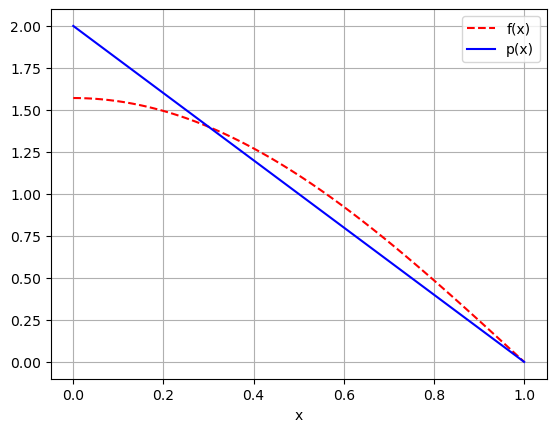

In [9]:
t = np.arange(0.0, 1.01, 0.01)

plt.plot(t, (np.pi/2)*np.cos(np.pi/2*t), 'r--', label='f(x)')
plt.plot(t, 2*(1-t), 'b', label='p(x)')
plt.grid(True)
plt.legend(loc="upper right")
plt.xlabel('x')

plt.show()

In [4]:
filepath='Ex_2_1/OUTPUT/outFile2.txt'

ave_imp=np.loadtxt(filepath, usecols = (1, ))
err_imp=np.loadtxt(filepath, usecols = (2, ))

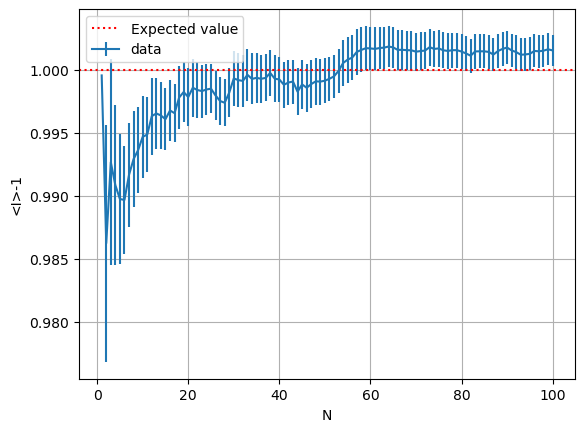

In [5]:
plt.errorbar(x, ave_imp, yerr=err_imp, label='data')
plt.axhline(1,color='r', linestyle="dotted", label = "Expected value")
plt.xlabel('N')
plt.ylabel('<I>-1')
plt.grid(True)
plt.legend()
plt.show()

### Comparing statistical uncertainties

By comparing the graph above to that obtained with uniform sampling, we can already observe how the statistical uncertainty is significantly smaller using importance sampling.
Below we plot the two to better appreciate the difference.

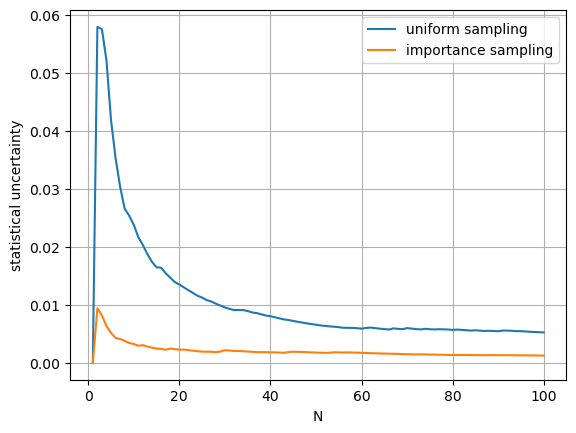

In [10]:
plt.plot(x,err, label='uniform sampling')
plt.plot(x,err_imp, label='importance sampling')
plt.xlabel('N')
plt.ylabel('statistical uncertainty')
plt.grid(True)
plt.legend()
plt.show()

## Ex 2_2

In this section we will study 3D Random Walks (RW).

At start, the "walker" is set to be in the origin; at each time step, the position of the walker is updated as follows:
- for **discrete** RWs, the walker moves parallel to one axis, in positive or negative direction, by a step of size 1. The direction and orientation is chosen randomly, with each one having the same probability.
Effectively, the walker will only explore the vertices of a 3D lattice of side 1.
- for **continous** RWs, the walker moves in a random uniformly extracted point whose (euclidean) distance from the previous position is 1. In this case the walker is able to explore the entirety of the 3D space freely.

For both cases, 10000 RWs of 100 steps each will be initialized. At the end of each RW, the final distance $\sqrt{\langle |\vec{r}_N|^2} $ from the origin will be extracted as data. Data blocking will be used, packing together the $\sqrt{\langle |\vec{r}_N|^2 }$ values in 100 blocks and using as final data the average value over each block, together with its uncertainty.

### Discrete Random Walk

We will compare the result with a function $f(N)=\sqrt{N}$

In [6]:
ave=np.loadtxt('Ex_2_2/OUTPUT/output_discrete.dat', usecols = (0, ))
err=np.loadtxt('Ex_2_2/OUTPUT/output_discrete.dat', usecols = (1, ))

relerr=err/ave

ave=np.sqrt(ave)
err=relerr*ave*1/2   # square root error propagation

steps=np.arange(100) +1

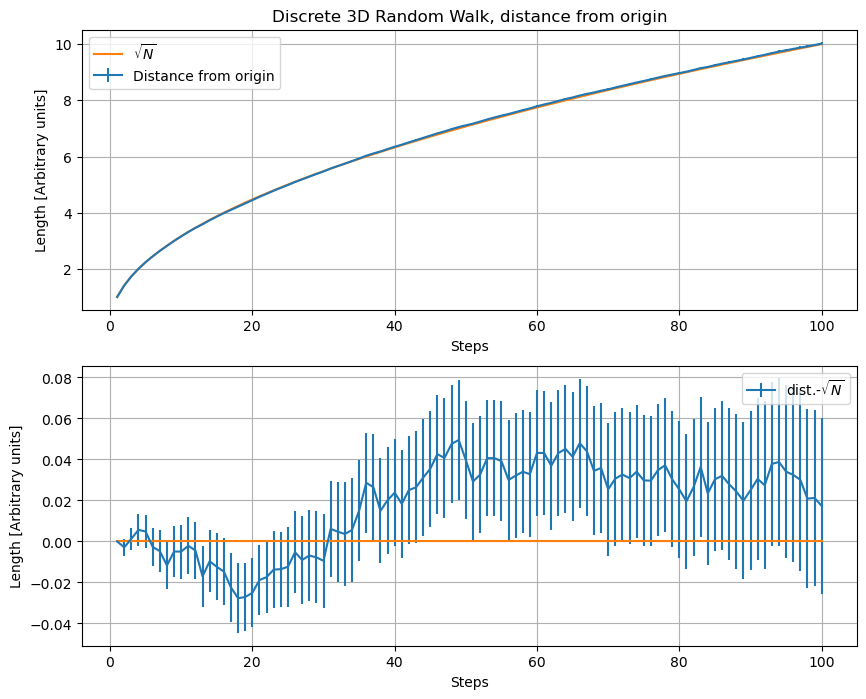

In [7]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.errorbar(steps, ave, yerr=err, label='Distance from origin')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Steps')
plt.ylabel('Length [Arbitrary units]')
plt.plot(steps, np.sqrt(steps), label='$\sqrt{N}$')
plt.title('Discrete 3D Random Walk, distance from origin')
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.errorbar(steps, ave-np.sqrt(steps), err, label='dist.-$\sqrt{N}$')
plt.plot(steps, np.zeros(len(steps)))
plt.xlabel('Steps')
plt.ylabel('Length [Arbitrary units]')
plt.grid(True)
plt.legend()

plt.show()

### Continous Random Walk

The additional difficulty here lies in sampling points on the surface of a sphere **uniformly**.
Uniformly generated values of $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$ will result in the points near the poles being explored significantly more.
To achieve our goal, we note that the 3D normal distribution is spherically symmetric, that is by generating $x,y,z$ coordinates through a normal distribution, and normalizing them with a factor $\frac{1}{\sqrt{x^2+y^2+z^2}}$, the point generated will be uniformely distributed on the surface of a sphere of radius 1.

In [57]:
points=np.random.normal(size=(1000,3))
for i in range(1000):
    normal=points[i,0]**2+points[i,1]**2+points[i,2]**2
    normal=np.sqrt(normal)
    for j in range(3):
        points[i,j]/=normal

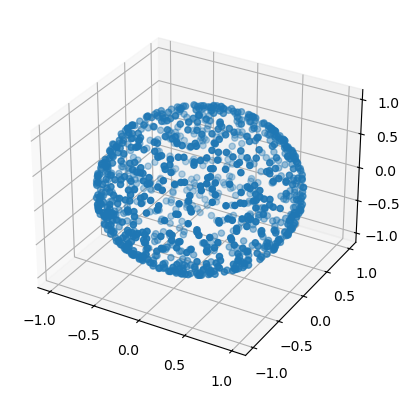

In [55]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')


ax.scatter(points[:,0], points[:,1], points[:,2])

Here follow the results of the simulation. It will be compared with a function $f(N)=\sqrt{N}$

In [8]:
ave=np.loadtxt('Ex_2_2/OUTPUT/output_continous.dat', usecols = (0, ))
#ave=np.sqrt(ave)
err=np.loadtxt('Ex_2_2/OUTPUT/output_continous.dat', usecols = (1, ))

ave=np.sqrt(ave)
err=err*1/2   # square root error propagation

steps=np.arange(100) +1

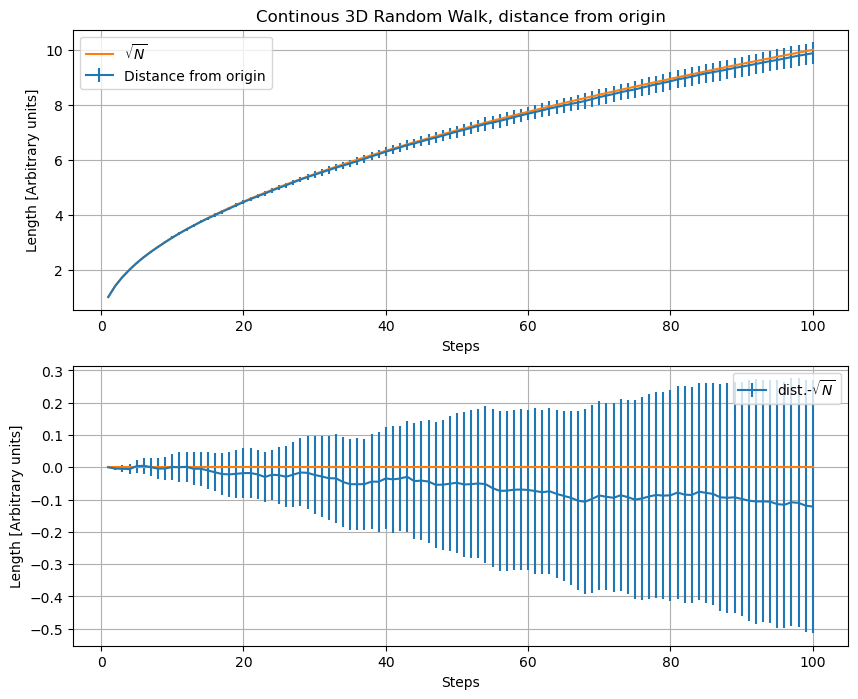

In [9]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.errorbar(steps, ave, yerr=err, label='Distance from origin')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Steps')
plt.ylabel('Length [Arbitrary units]')
plt.plot(steps, np.sqrt(steps), label='$\sqrt{N}$')
plt.title('Continous 3D Random Walk, distance from origin')
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.errorbar(steps, ave-np.sqrt(steps), err, label='dist.-$\sqrt{N}$')
plt.plot(steps, np.zeros(len(steps)))
plt.xlabel('Steps')
plt.ylabel('Length [Arbitrary units]')
plt.grid(True)
plt.legend()

plt.show()

In both the discrete and the continous case, the fact that the variance increase as the number of steps increases is indicative of diffusive behavior. Both resulting curves fit reasonably well with $f(N)=\sqrt{N}$